In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data preprocessing
## Membaca / Load data csv

In [2]:
df = pd.read_csv('pima-data.csv')

In [3]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


In [5]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Cek nilai yang kosong

In [6]:
df.isnull().values.any()

False

### Mengecek korelasi fitur

Membuat sebuah helper untuk mengecek

In [7]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

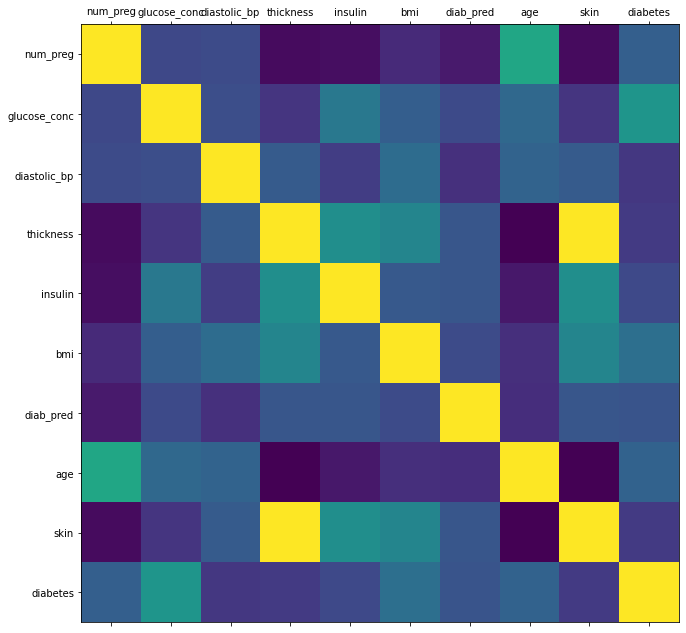

In [8]:
plot_corr(df)

In [9]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


thickness dan skin berkolerasi 1-1 (-0.081672)

In [10]:
# Menghapus skin
del df['skin']

In [11]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


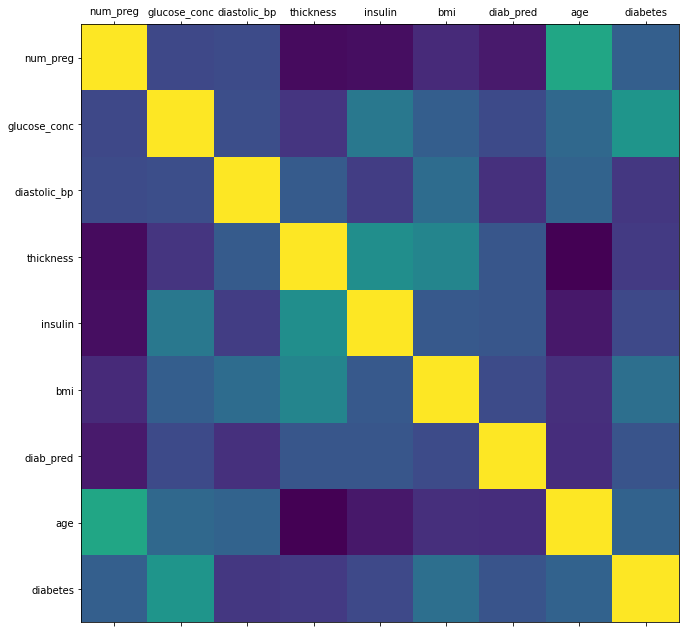

In [12]:
plot_corr(df)

## Merapihkan data / Molding data
Cek apakah ada data atau nilai yang tidak berupa angka

In [13]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Ubah nilai diabetes dimana True = 1, False = 0

In [14]:
# Buat map untuk diabetes
diabetes_map = {True: 1, False:0}
# Ubah diabetes
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [15]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Cek apakah ada data yang kosong/tidak ter map

In [16]:
df.isnull().values.any()

False

Membagi distribusi orang yang terkena diabtes atau tidak

In [17]:
num_obs = len(df)
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print(f'Jumlah yang terkena diabetes = {num_true} atau {round((num_true / num_obs) * 100)} %')
print(f'Jumlah yang tidak terkena diabetes = {num_false} atau {round((num_false / num_obs) * 100)} %')

Jumlah yang terkena diabetes = 268 atau 35 %
Jumlah yang tidak terkena diabetes = 500 atau 65 %


## Splitting Data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_name = ['diabetes']

X = df[feature_col_names].values
y = df[predicted_class_name].values
test_split_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_size, random_state=42)

Cek apakah sudah terbagi 70% train 30% test

In [20]:
print(f'X train = {(len(X_train)/len(df.index)) * 100} %')
print(f'X test = {(len(X_test)/len(df.index)) * 100} %')

X train = 69.921875 %
X test = 30.078125 %


### Memverifikasi apakah prediction class sudah terbagi juga

In [21]:
print(f"Original True = {len(df.loc[df['diabetes'] == 1])} atau {(len(df.loc[df['diabetes'] == 1]) / len(df.index)) * 100}%")
print(f"Original False = {len(df.loc[df['diabetes'] == 0])} atau {(len(df.loc[df['diabetes'] == 0]) / len(df.index)) * 100}%")
print('')
print(f"Train True = {len(y_train[y_train[:] == 1])} atau {(len(y_train[y_train[:] == 1]) / len(y_train)) * 100}%")
print(f"Train False = {len(y_train[y_train[:] == 0])} atau {(len(y_train[y_train[:] == 0]) / len(y_train)) * 100}%")
print('')
print(f"Test True = {len(y_test[y_test[:] == 1])} atau {(len(y_test[y_test[:] == 1]) / len(y_test)) * 100}%")
print(f"Test False = {len(y_test[y_test[:] == 0])} atau {(len(y_test[y_test[:] == 0]) / len(y_test)) * 100}%")

Original True = 268 atau 34.89583333333333%
Original False = 500 atau 65.10416666666666%

Train True = 188 atau 35.00931098696462%
Train False = 349 atau 64.99068901303538%

Test True = 80 atau 34.63203463203463%
Test False = 151 atau 65.36796536796537%


## Hidden missing values
Ada beberapa data yang bernilai 0, apakah kita bisa memproses data 0?

In [22]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dapat dilihat terdapat nilai 0 pada insulin dan thickness

Kemudian kita mengecek ada berapa nilai 0 pada data

In [23]:
print(f"# rows in dataframe {len(df)}")
print(f"# rows missing glucose_conc: {len(df.loc[df['glucose_conc'] == 0])}")
print(f"# rows missing diastolic_bp: {len(df.loc[df['diastolic_bp'] == 0])}")
print(f"# rows missing thickness: {len(df.loc[df['thickness'] == 0])}")
print(f"# rows missing insulin: {len(df.loc[df['insulin'] == 0])}")
print(f"# rows missing bmi: {len(df.loc[df['bmi'] == 0])}")
print(f"# rows missing diab_pred: {len(df.loc[df['diab_pred'] == 0])}")
print(f"# rows missing age: {len(df.loc[df['age'] == 0])}")

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


Ada beberapa cara untuk mengatasi ini, bisa mengabaikan kolom, menghapus kolom, atau mengisi nilai
Karena lebih dari 50% missing insulin jadi kita tidak bisa mengabaikan atau menghapus. jadi kita mengisi dengan impute mean

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
fill_0 = SimpleImputer(missing_values=0, strategy='mean')

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [26]:
X_train

array([[  1.        ,  95.        ,  60.        , ...,  23.9       ,
          0.26      ,  22.        ],
       [  5.        , 105.        ,  72.        , ...,  36.9       ,
          0.159     ,  28.        ],
       [  4.34056399, 135.        ,  68.        , ...,  42.3       ,
          0.365     ,  24.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.34056399, 141.        ,  72.24131274, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.34056399, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

# Training dengan beberapa algoritma

# Training dengan Naive Bayes Algorithm

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

### Performance training data

In [29]:
# Prediksi menggunakan training data
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics

print(f"Accuracy : {metrics.accuracy_score(y_train, nb_predict_train)}")

Accuracy : 0.7541899441340782


### Performance testing data

In [30]:
nb_predict_test = nb_model.predict(X_test)

print(f"Accuracy : {metrics.accuracy_score(y_test, nb_predict_test)}")

Accuracy : 0.7359307359307359


### Metrics

In [31]:
print('Confusion matrix')
print(f'{metrics.confusion_matrix(y_test, nb_predict_test)}')
print('')
print('Classification report')
print(f'{metrics.classification_report(y_test, nb_predict_test)}')

Confusion matrix
[[118  33]
 [ 28  52]]

Classification report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



# Training dengan Random Forest Algorithm

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=10)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=42)

### Predict training data

In [33]:
rf_predict_train = rf_model.predict(X_train)

print(f"Accuracy : {metrics.accuracy_score(y_train, rf_predict_train)}")

Accuracy : 0.9869646182495344


### Predict test data

In [34]:
rf_predict_test = rf_model.predict(X_test)

print(f"Accuracy : {metrics.accuracy_score(y_test, rf_predict_test)}")

Accuracy : 0.70995670995671


In [35]:
print('Confusion matrix')
print(f'{metrics.confusion_matrix(y_test, rf_predict_test)}')
print('')
print('Classification report')
print(f'{metrics.classification_report(y_test, rf_predict_test)}')

Confusion matrix
[[121  30]
 [ 37  43]]

Classification report
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       151
           1       0.59      0.54      0.56        80

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



# Training dengan Logistic Regression Algorithm

In [36]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print(f"Accuracy: {metrics.accuracy_score(y_test, lr_predict_test)}")
print('Confusion matrix')
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print('')
print('Classification Report')
print(metrics.classification_report(y_test, lr_predict_test))


Accuracy: 0.7445887445887446
Confusion matrix
[[128  23]
 [ 36  44]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



### Tes logistic regression supaya balance dengan class weight balance
Menggunakan looping dengan mengganti parameter C nya

1st max value of 0.738 occured at C=0.300


Text(0, 0.5, 'recall score')

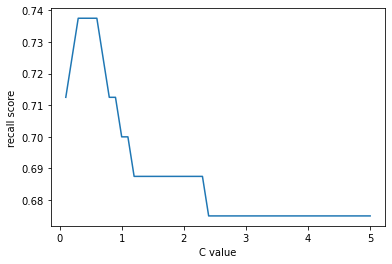

In [37]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight='balanced', random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [38]:
lr_model = LogisticRegression(class_weight='balanced', C=best_score_C_val, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print(f"Accuracy: {metrics.accuracy_score(y_test, lr_predict_test)}")
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print('')
print('Classification Report')
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7142857142857143
[[106  45]
 [ 21  59]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231

0.7375


In [39]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight='balanced')

lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=42, refit=False)

### Predict test data

In [40]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print(f"Accuracy: {metrics.accuracy_score(y_test, lr_cv_predict_test)}")
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print('')
print('Classification Report')
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7056277056277056
[[109  42]
 [ 26  54]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.68      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



# Menggunakan model yang sudah di train
### Menyimpan model

In [42]:
import joblib

joblib.dump(lr_cv_model, 'model.skl')

['model.skl']

### Load model

In [43]:
lr_cv_model = joblib.load('model.skl')

### Tes / predict model yang telah di load

In [46]:
df_predict = pd.read_csv('predict.csv')

In [47]:
df_predict

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age
0,1,89,66,23,94,28.1,0.167,21
1,2,197,70,45,543,30.5,0.158,53
2,7,100,0,0,0,30.0,0.484,32
3,1,103,30,38,83,43.3,0.183,33


Data diatas sudah di clean dimana skin, dan diabetes sudah dihapus  
Selanjutnya kita akan impute karena ada nol pada data

In [50]:
X_predict = df_predict

fill_0 = SimpleImputer(missing_values=0, strategy='mean')
X_predict = fill_0.fit_transform(X_predict)

### Predict data X_predict

In [52]:
lr_cv_model.predict(X_predict)

array([0, 1, 0, 0], dtype=int64)